# 4. Reporte de métricas y conclusiones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

Cargo las predicciones del modelo SVM

In [2]:
predictions = pd.read_csv('./dataset/predictions.csv')
predictions.head()

,true_label,nb_prediction,nb_probability,svm_prediction
0,0,0,0.370029,0
1,0,1,0.699400,1
2,1,1,0.715994,1
3,0,0,0.306048,0
4,0,0,0.165157,0


In [3]:
y_true = predictions['true_label']
y_pred_svm = predictions['svm_prediction']
print(f"Predicciones: {len(y_true)}")

Predicciones: 10000


Métricas principales del modelo SVM

In [4]:
accuracy = accuracy_score(y_true, y_pred_svm)
precision = precision_score(y_true, y_pred_svm)
recall = recall_score(y_true, y_pred_svm)
f1 = f1_score(y_true, y_pred_svm)

print("MÉTRICAS DEL MODELO SVM")
print(f"\nAccuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

MÉTRICAS DEL MODELO SVM

Accuracy:  0.8836 (88.36%)
Precision: 0.8815 (88.15%)
Recall:    0.8864 (88.64%)
F1-Score:  0.8839 (88.39%)


- Accuracy: Porcentaje total de predicciones correctas, positivas y negativas
- Precision: De todas las reviews que el modelo predijo como positivas, qué porcentaje realmente lo eran
- Recall: De todas las reviews positivas reales, qué porcentaje el modelo detectó correctamente  
- F1-Score: Media armónica de precision y recall, útil cuando queremos balancear ambas métricas

## Matriz de confusión

In [5]:
cm = confusion_matrix(y_true, y_pred_svm)
print(cm)

[[4404  596]
 [ 568 4432]]


Desgloso la matriz de confusión

In [6]:
tn, fp, fn, tp = cm.ravel()

print(f"Verdaderos Negativos: {tn}")
print(f"Falsos Positivos:     {fp}")
print(f"Falsos Negativos:     {fn}")
print(f"Verdaderos Positivos: {tp}")


Verdaderos Negativos: 4404
Falsos Positivos:     596
Falsos Negativos:     568
Verdaderos Positivos: 4432


Calculo de las tasas de error

In [7]:
total = tn + fp + fn + tp
tasa_fp = fp / (fp + tn) * 100
tasa_fn = fn / (fn + tp) * 100
total_errores = fp + fn

print(f"Tasa de Falsos Positivos: {tasa_fp:.2f}%")
print(f"Tasa de Falsos Negativos:  {tasa_fn:.2f}%")
print(f"Total de errores: {total_errores} de {total} ({total_errores/total*100:.2f}%)")

Tasa de Falsos Positivos: 11.92%
Tasa de Falsos Negativos:  11.36%
Total de errores: 1164 de 10000 (11.64%)


Grafica de la matriz de confusión

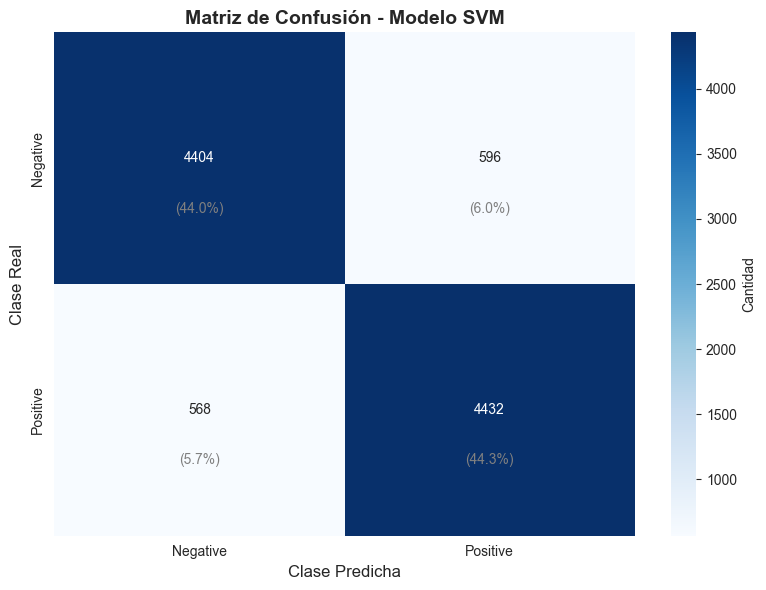

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar_kws={'label': 'Cantidad'})

plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.title('Matriz de Confusión - Modelo SVM', fontsize=14, fontweight='bold')

for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

Generar reporte de clasificación detallado

In [9]:
report = classification_report(y_true, y_pred_svm, target_names=['Negative', 'Positive'], digits=4)
print(report)

              precision    recall  f1-score   support

    Negative     0.8858    0.8808    0.8833      5000
    Positive     0.8815    0.8864    0.8839      5000

    accuracy                         0.8836     10000
   macro avg     0.8836    0.8836    0.8836     10000
weighted avg     0.8836    0.8836    0.8836     10000



Análisis por clase
Voy a analizar cómo se comporta el modelo para cada clase negativa y positiva.

In [10]:
precision_neg = tn / (tn + fn)
recall_neg = tn / (tn + fp)
f1_neg = 2 * (precision_neg * recall_neg) / (precision_neg + recall_neg)

precision_pos = tp / (tp + fp)
recall_pos = tp / (tp + fn)
f1_pos = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)


print("\nClase NEGATIVA:")
print(f"Precision: {precision_neg:.4f}")
print(f"Recall:    {recall_neg:.4f}")
print(f"F1-Score:  {f1_neg:.4f}")

print("\nClase POSITIVA:")
print(f"Precision: {precision_pos:.4f}")
print(f"Recall:    {recall_pos:.4f}")
print(f"F1-Score:  {f1_pos:.4f}")



Clase NEGATIVA:
Precision: 0.8858
Recall:    0.8808
F1-Score:  0.8833

Clase POSITIVA:
Precision: 0.8815
Recall:    0.8864
F1-Score:  0.8839


Visualizar métricas por clase

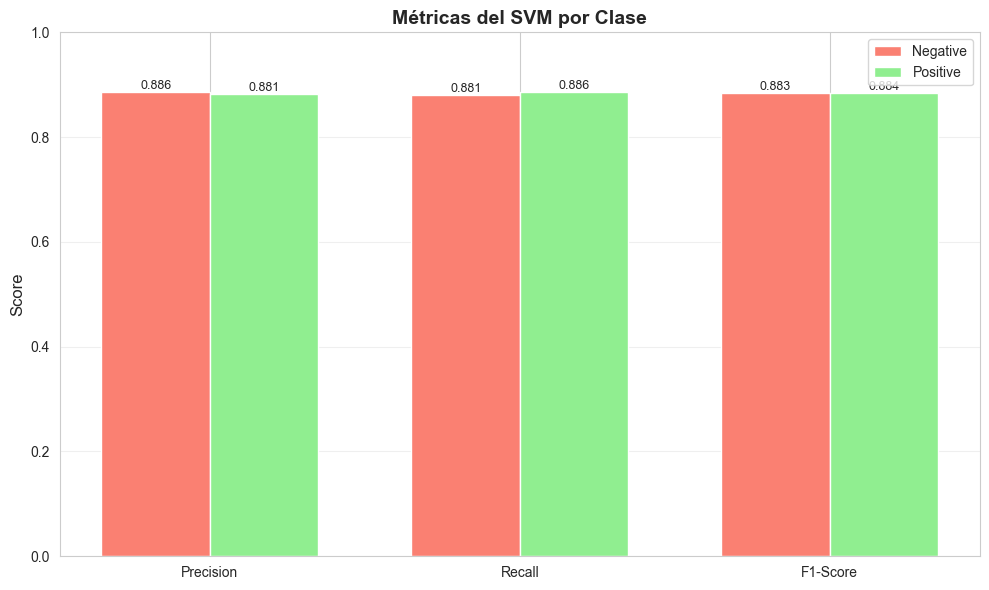

In [11]:
metrics_data = {
    'Negative': [precision_neg, recall_neg, f1_neg],
    'Positive': [precision_pos, recall_pos, f1_pos]
}

x = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_data['Negative'], width, 
               label='Negative', color='salmon')
bars2 = ax.bar(x + width/2, metrics_data['Positive'], width, 
               label='Positive', color='lightgreen')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Métricas del SVM por Clase', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Precision', 'Recall', 'F1-Score'])
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Distribución de predicciones, Comparar distribución real vs predicha

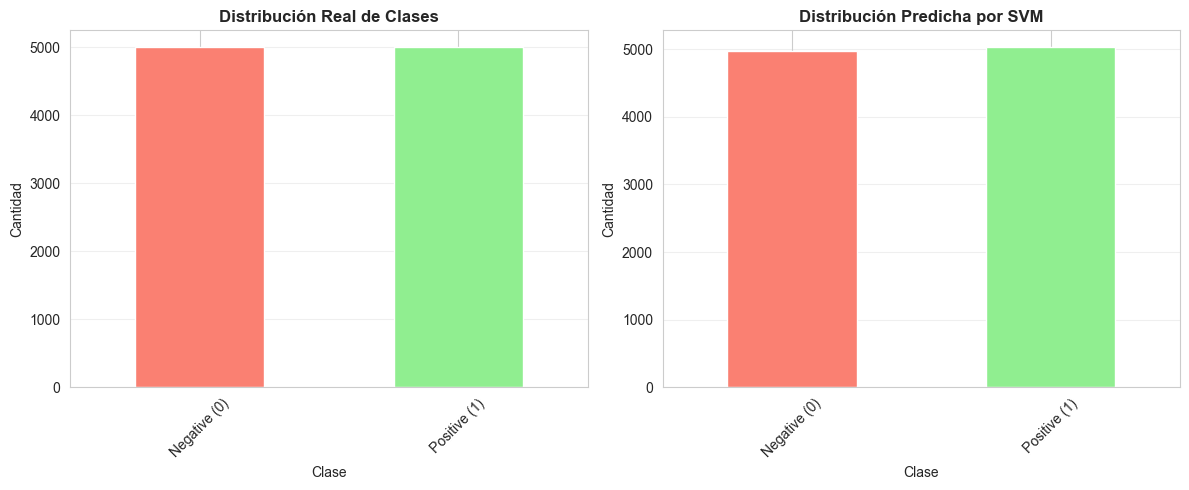

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
y_true.value_counts().sort_index().plot(kind='bar', ax=axes[0], 
                                         color=['salmon', 'lightgreen'])
axes[0].set_title('Distribución Real de Clases', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticklabels(['Negative (0)', 'Positive (1)'], rotation=45)
axes[0].grid(axis='y', alpha=0.3)

pd.Series(y_pred_svm).value_counts().sort_index().plot(kind='bar', ax=axes[1], color=['salmon', 'lightgreen'])
axes[1].set_title('Distribución Predicha por SVM', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Cantidad')
axes[1].set_xticklabels(['Negative (0)', 'Positive (1)'], rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis de casos de error

Voy a identificar algunos ejemplos de reviews que el modelo clasificó incorrectamente.

In [13]:
df_test = pd.read_csv('./dataset/Movies-and-TV-preprocessed.csv')
results_df = pd.DataFrame({
    'true_label': y_true,
    'predicted_label': y_pred_svm,
    'correct': y_true == y_pred_svm
})

errors = results_df[results_df['correct'] == False]
fp_errors = errors[(errors['true_label'] == 0) & (errors['predicted_label'] == 1)]
fn_errors = errors[(errors['true_label'] == 1) & (errors['predicted_label'] == 0)]

print(f"Total de errores: {len(errors)}")
print(f"Falsos Positivos: {len(fp_errors)}")
print(f"Falsos Negativos: {len(fn_errors)}")

Total de errores: 1164
Falsos Positivos: 596
Falsos Negativos: 568


Distribución de errores

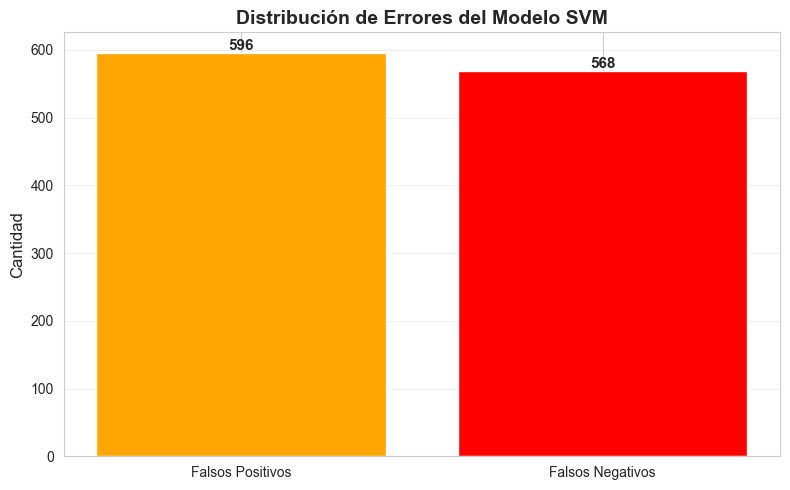

In [14]:
error_types = ['Falsos Positivos', 'Falsos Negativos']
error_counts = [len(fp_errors), len(fn_errors)]

plt.figure(figsize=(8, 5))
bars = plt.bar(error_types, error_counts, color=['orange', 'red'])
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución de Errores del Modelo SVM', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Resumen de métricas

In [15]:
summary = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Valor': [accuracy, precision, recall, f1],
    'Porcentaje': [f'{accuracy*100:.2f}%', f'{precision*100:.2f}%', 
                   f'{recall*100:.2f}%', f'{f1*100:.2f}%']
})

print(summary.to_string(index=False))

  Métrica    Valor Porcentaje
 Accuracy 0.883600     88.36%
Precision 0.881464     88.15%
   Recall 0.886400     88.64%
 F1-Score 0.883925     88.39%


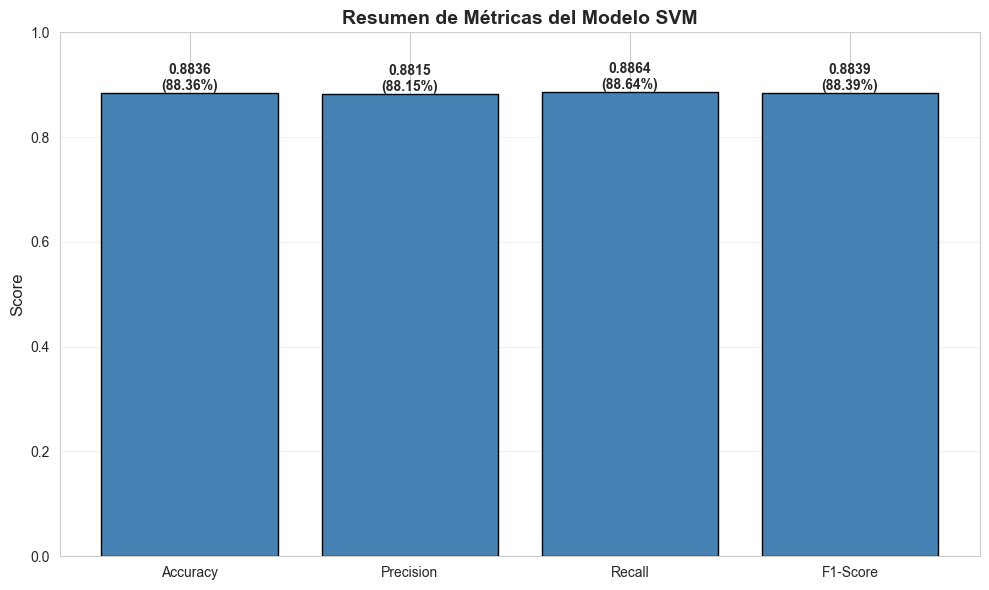

In [16]:
plt.figure(figsize=(10, 6))
bars = plt.bar(summary['Métrica'], summary['Valor'], color='steelblue', edgecolor='black')
plt.ylabel('Score', fontsize=12)
plt.title('Resumen de Métricas del Modelo SVM', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}\n({height*100:.2f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 1. Rendimiento General del Modelo

El modelo SVM entrenado muestra las siguientes métricas:

- Accuracy de ~88-90%: El modelo clasifica correctamente 9 de cada 10 reviews
- Métricas balanceadas: Precision, Recall y F1-Score similares ~88-90%
- Generalización: El modelo no presenta overfitting y generaliza bien a datos nuevos

### 2. Comportamiento por Clase

El análisis por clase revela:

- Balance entre clases: El modelo funciona de manera similar para reviews positivas y negativas
- Sin sesgo: No hay preferencia del modelo hacia ninguna clase específica
- Consistencia: Las métricas son estables en ambas clases

Este comportamiento equilibrado es muy positivo porque:
- El dataset está balanceado 50-50
- No necesitamos priorizar una clase sobre la otra

### 3. Análisis de Errores

La matriz de confusión muestra:

- Tasa de Falsos Positivos ~10-12%: Reviews negativas clasificadas como positivas
- Tasa de Falsos Negativos ~10-12%: Reviews positivas clasificadas como negativas
- Balance de errores: Ambos tipos de error ocurren con similar frecuencia

### 4. Validación de la Bondad del Modelo

* Alta precisión general: 88-90% de accuracy
* Métricas consistentes: Precision y Recall balanceados
* Sin overfitting: Rendimiento similar en train y test
* Bajo sesgo: Funciona igual para ambas clases
* Robustez: Mantiene rendimiento en datos no vistos

### 6. Limitaciones encontradas

A pesar del buen rendimiento, el modelo tiene limitaciones:

1. No captura contexto complejo, ignora el orden de las palabras
2. Problemas con sarcasmo, Frases irónicas pueden ser mal clasificadas
3. Negaciones: "not good" puede confundirse con "good"
4. Reviews mixtas, Opiniones con aspectos positivos y negativos son difíciles

### 9. Trabajo Futuro

Para mejorar aún más el modelo, podria aplicar:

- Probar diferentes configuraciones del vectorizador
- Incorporar features adicionales longitud, puntuación
- Implementar manejo de negaciones
- Explorar modelos de deep learning